https://www.kaggle.com/datasets/hemendrasr/pizza-vs-ice-cream

In [20]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
%cd "/content/gdrive/MyDrive/deeeep"
!ls

/content/gdrive/MyDrive/deeeep
Conta.zip	   icecream.jpg        pizza.jpg		 pruebapizza.eps  valid
helado.jpg	   pizza2.jpeg	       Pizza_or_ice_cream.ipynb  test
heleadoprueba.jpg  Pizza-Ice_model.h5  pizza.png		 train


In [22]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [23]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator

##Preparacion de las imagenes

In [24]:
# Debido a que tamaño del dataset de entrenamiento no es grande, generamos imagenes nuevas con las origibales con ligeras modificaciones
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 40,
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True
                )

train_path = '/content/gdrive/MyDrive/deeeep/train'
train_set = train_datagen.flow_from_directory(
                directory=train_path,
                target_size=(150,150),
                batch_size=32,
                class_mode = 'categorical'
                )

val_datagen = ImageDataGenerator(rescale=1/255)
val_path = '/content/gdrive/MyDrive/deeeep/valid'
val_set = val_datagen.flow_from_directory(
                directory=val_path,
                target_size=(150,150),
                batch_size=32,
                class_mode = 'categorical'
                )

test_datagen = ImageDataGenerator(rescale=1/255)
test_path = '/content/gdrive/MyDrive/deeeep/test'
test_set = test_datagen.flow_from_directory(
                directory=test_path,
                target_size=(150,150),
                batch_size=32,
                class_mode = 'categorical'
                )

Found 718 images belonging to 2 classes.
Found 208 images belonging to 2 classes.
Found 106 images belonging to 2 classes.


Visualización de las labels de nuestro dataset

In [25]:
train_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
val_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [27]:
test_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

###Modelo 1

Para el primer modelo, se crea un modelo seciencil, el cual consiste de dos capas convolutivas y se realizan entre estas un maxpooling de 2x2, despues de esto, con los datos obtenidos creamos un arreglo usando Flatten y dos capas densas para la clasificacion de el modelo.

In [28]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = "relu", input_shape = (150,150,3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(2, activation = "softmax"))

Para compilar el modelo usamos Adam optimizer, binary_crossentropy para la perdida (ya que nuestro modelo clasifica en dos caterorias) y como metric accuracy.

In [29]:
model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

Visualizacion del modelo

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 146, 146, 64)      4864      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 69, 69, 32)        51232     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 34, 34, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 36992)             0         
                                                                 
 dense_4 (Dense)             (None, 256)              

Entrenamiento

In [31]:
hist = model.fit(train_set, validation_data = val_set, epochs = 20)

Epoch 1/20
23/23 [==============================] - 86s 4s/step - loss: 0.7352 - accuracy: 0.5808 - val_loss: 0.6653 - val_accuracy: 0.5144
Epoch 2/20
23/23 [==============================] - 71s 3s/step - loss: 0.5353 - accuracy: 0.7535 - val_loss: 0.4245 - val_accuracy: 0.8125
Epoch 3/20
23/23 [==============================] - 68s 3s/step - loss: 0.4588 - accuracy: 0.7994 - val_loss: 0.4166 - val_accuracy: 0.8077
Epoch 4/20
23/23 [==============================] - 74s 3s/step - loss: 0.4770 - accuracy: 0.7772 - val_loss: 0.3414 - val_accuracy: 0.8558
Epoch 5/20
23/23 [==============================] - 70s 3s/step - loss: 0.5227 - accuracy: 0.7813 - val_loss: 0.8083 - val_accuracy: 0.5385
Epoch 6/20
23/23 [==============================] - 74s 3s/step - loss: 0.5246 - accuracy: 0.7228 - val_loss: 0.3605 - val_accuracy: 0.8510
Epoch 7/20
23/23 [==============================] - 73s 3s/step - loss: 0.4601 - accuracy: 0.7939 - val_loss: 0.4139 - val_accuracy: 0.8125
Epoch 8/20
23/23 [==

###Modelo 2

En este nuevo modelo, se agrego un dropout de 25% despues del segundo MaxPool, esto para evitar overfitting, despues de esto, se agrego otra capa convolutiva y otra capa de MaxPool, para evitar overfitting se vuelve a hacer un dropout de 25% y finalmente de lo obtenido realizamos un Flatten y dos capas densas, pero en la capa final cambiamos de 'softmax' a 'sigmoid', ya que esta es mejor para clasificaciones binarias

In [32]:
model2 = Sequential()
model2.add(Conv2D(filters = 64, kernel_size = (5,5), activation = "relu", input_shape = (150,150,3)))
model2.add(MaxPool2D(pool_size = (2,2)))
model2.add(Conv2D(filters = 32, kernel_size = (5,5), activation = "relu"))
model2.add(MaxPool2D(pool_size = (2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(filters = 16, kernel_size = (5,5), activation = "relu"))
model2.add(MaxPool2D(pool_size = (2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(256, activation = "relu"))
model2.add(Dense(2, activation = "sigmoid"))

Para compilar el modelo usamos Adam optimizer, binary_crossentropy para la perdida (ya que nuestro modelo clasifica en dos caterorias) y como metric accuracy.

In [33]:
model2.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

Visualizacion del modelo

In [34]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 146, 146, 64)      4864      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 69, 69, 32)        51232     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 34, 34, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 34, 34, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 16)       

Training del modelo

In [35]:
hist2 = model2.fit(train_set, validation_data = val_set, epochs = 20)

Epoch 1/20
23/23 [==============================] - 71s 3s/step - loss: 0.6654 - accuracy: 0.5780 - val_loss: 0.6210 - val_accuracy: 0.6875
Epoch 2/20
23/23 [==============================] - 72s 3s/step - loss: 0.5527 - accuracy: 0.7563 - val_loss: 0.3996 - val_accuracy: 0.8221
Epoch 3/20
23/23 [==============================] - 72s 3s/step - loss: 0.4699 - accuracy: 0.7981 - val_loss: 0.3783 - val_accuracy: 0.8462
Epoch 4/20
23/23 [==============================] - 72s 3s/step - loss: 0.4572 - accuracy: 0.8050 - val_loss: 0.3592 - val_accuracy: 0.8702
Epoch 5/20
23/23 [==============================] - 72s 3s/step - loss: 0.4332 - accuracy: 0.8078 - val_loss: 0.4865 - val_accuracy: 0.8077
Epoch 6/20
23/23 [==============================] - 68s 3s/step - loss: 0.4391 - accuracy: 0.8162 - val_loss: 0.4292 - val_accuracy: 0.7933
Epoch 7/20
23/23 [==============================] - 73s 3s/step - loss: 0.4588 - accuracy: 0.8036 - val_loss: 0.4266 - val_accuracy: 0.8558
Epoch 8/20
23/23 [==

#Analisis de los resultados


###Modelo 1

Graficamos el accuracy y el loss de nuestro modelo1, y podemos ver que el accuracy tanto de train como del test casi no cambia y titne picos para abajo, por lo que el modelo no esta aprendiendo como nos gustaria, por la parte del loss, este igual se mantiene casi constante, unicamente con su desenso en la epoc 1

<Axes: >

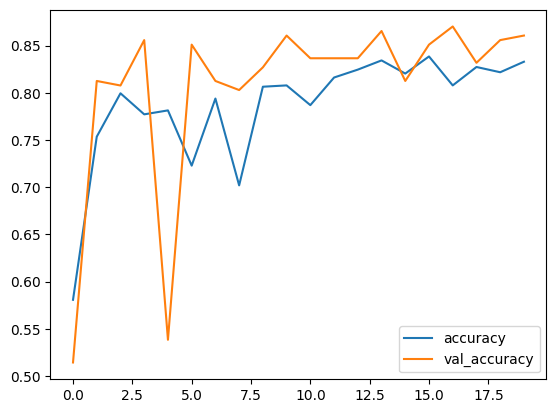

In [36]:
# Plot training and val curves
import pandas as pd

df = pd.DataFrame(hist.history)
df.plot(y=['accuracy', 'val_accuracy'])

<Axes: >

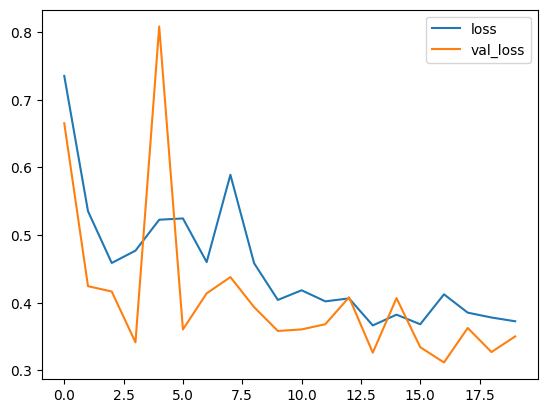

In [37]:
df.plot(y=['loss', 'val_loss'])

In [38]:
model.evaluate(test_set)

4/4 [==============================] - 23s 7s/step - loss: 0.2923 - accuracy: 0.8491


[0.2922685146331787, 0.849056601524353]

###Modelo 2

En en caso del modelo 2, podemos ver que el accuracy del modelo va en aumento hasta pasar del 0.9, tanto en train como en validation,y al tener un acurracy mayor en validation, podemos ver que nuestro modelo no se encuentra overfiteado.

De igual forma, podemos ver como segun las epocs, el loss va bajando y tambien tenemos un acurracy muy alto en nuestro test.

<Axes: >

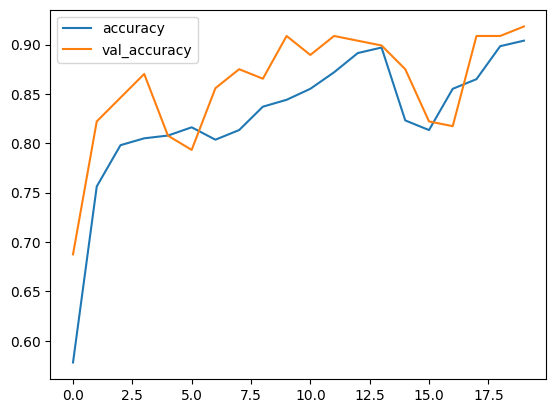

In [39]:
# Plot training and val curves
import pandas as pd

df2 = pd.DataFrame(hist2.history)
df2.plot(y=['accuracy', 'val_accuracy'])

<Axes: >

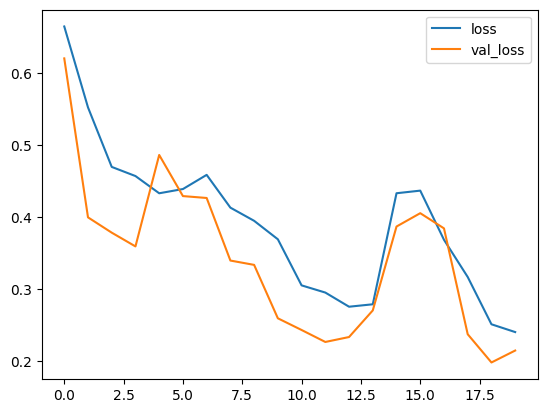

In [40]:
df2.plot(y=['loss', 'val_loss'])

In [41]:
model2.evaluate(test_set)

4/4 [==============================] - 2s 426ms/step - loss: 0.1994 - accuracy: 0.9245


[0.19943228363990784, 0.9245283007621765]

##Cambios realizados para mejora del modelo

En este caso, para la mejora del modelo lo que se agrego fue el dropeo del 25% de los nodos, para evitar overfitting, agregamos otra capa de conv2D y otra de Maxpooling, para un mayor procesamiento de los datos y otro dropeo final del 25% nuevamente.

Tambien se cambio la activacion de la ultima capa densa del modelo de softmax a sigmoid, ya que estamos trabajando con un modelo binario y esta activación es mejor[1]

Aparte de esto se entreno con una mayor cantidad de epocas en el segundo modelo para que asi el modelo tenga mayor oportunidad de aprender.

1. https://towardsdatascience.com/sigmoid-and-softmax-functions-in-5-minutes-f516c80ea1f9

Resultados obtenidos en el modelo 1:                  

Train_accuracy: 0.54                                  

Validation_accuracy: 0.54                             

Test_accuracy: 0.55                                   

---



Resultados obtenidos en el modelo 2:

Train_accuracy: 0.90

Validation_accuracy: 0.92

Test_accuracy: 0.95




In [42]:
hist2.model.save('Pizza-Ice_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
from keras.models import load_model
import numpy as np

In [44]:
ans = {
    0: 'pizza',
    1: 'helado'
}

In [45]:
model = load_model('Pizza-Ice_model.h5')

In [46]:
#Obtencion de la imagen
image = tf.keras.utils.load_img('pizza.jpg', target_size=(150, 150))

#Modificaciones previas a la imagen para que tenga el formato necesario
img = np.array(image)
img = img / 255.0
img = img.reshape(1,150,150,3)

#Prediccion del modelo
label = model.predict(img)

#Clasificacion según el resultado
if label[0][0] < 0.5:
  index = 0
else:
  index = 1

1/1 [==============================] - 0s 129ms/step


In [47]:
#Obtencion de la imagen
image2 = tf.keras.utils.load_img('icecream.jpg', target_size=(150, 150))

#Modificaciones previas a la imagen para que tenga el formato necesario
img2 = np.array(image2)
img2 = img2 / 255.0
img2 = img2.reshape(1,150,150,3)

#Prediccion del modelo
label2 = model.predict(img2)

#Clasificacion según el resultado
if label2[0][0] < 0.5:
  index2 = 0
else:
  index2 = 1

1/1 [==============================] - 0s 40ms/step


Text(0.5, 1.0, 'pizza')

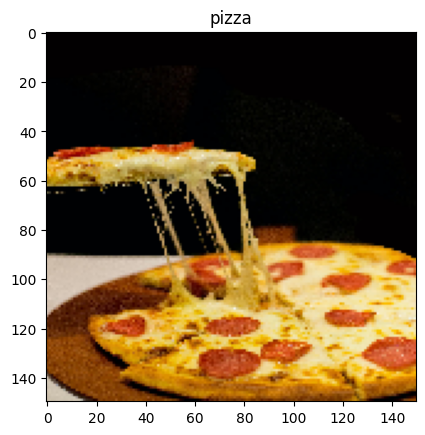

In [48]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title(ans[index])

Text(0.5, 1.0, 'helado')

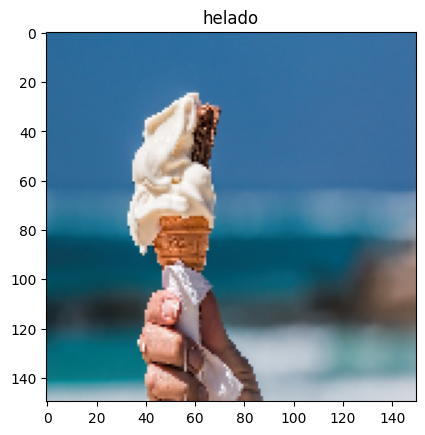

In [49]:
plt.imshow(image2)
plt.title(ans[index2])